In [77]:
import numpy as np
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
%matplotlib inline 

/Users/solovyev/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


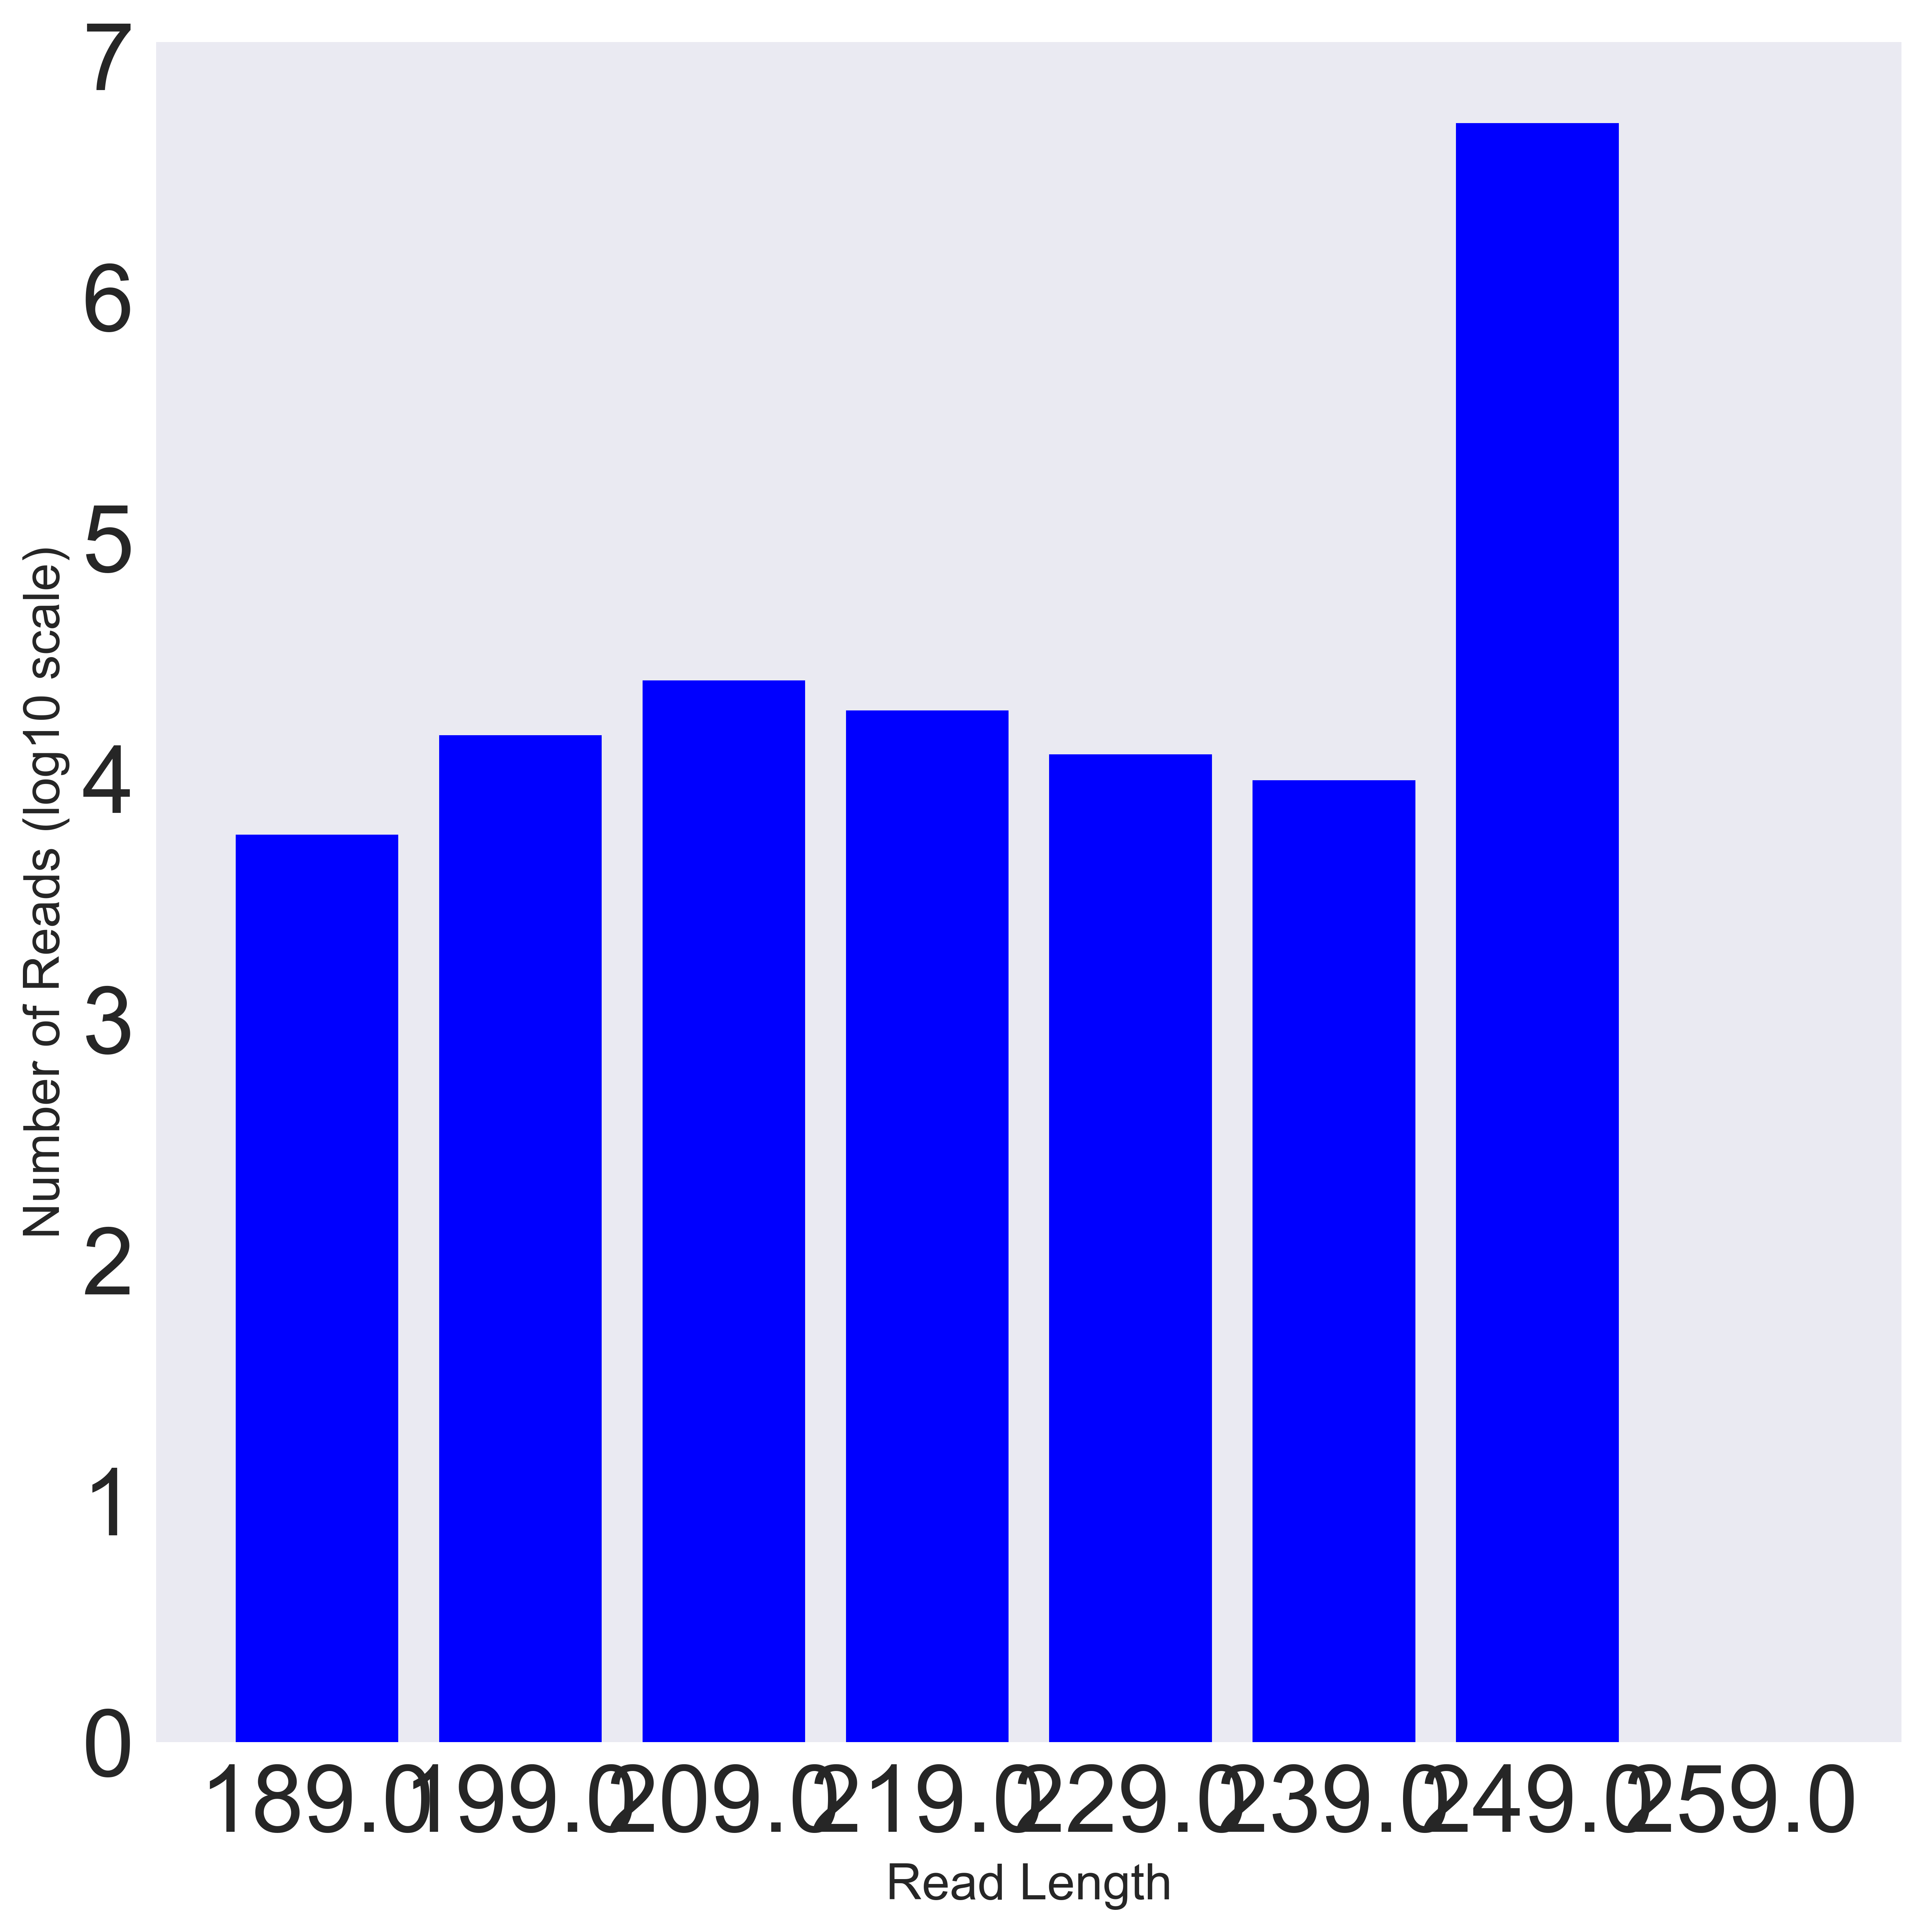

In [78]:
# plot a histogram of read lengths  
hist_data = pd.read_csv('~/Documents/bioc3301_project/ngs_data/split_library/histograms.txt', sep='\t')
hist_data = hist_data.dropna()

hist_data.head()

hist_data['reads_log'] = np.log10(hist_data['Count'].values)
hist_data['reads_log'].iloc[7] = 0
hist_data

fig = plt.figure(figsize=(10, 10), dpi=600)
ax = plt.subplot(111)
ax.bar(hist_data['Length'].values,hist_data['reads_log'], facecolor='blue')

plt.xlabel('Read Length', fontsize =16)
plt.ylabel('Number of Reads (log10 scale)', fontsize =16)
plt.grid(False)

plt.show()


In [160]:
metadata = pd.read_table('~/Documents/bioc3301_project/ngs_data/map_with_alpha.tsv', sep='\t')

data = metadata[['#SampleID', 'SampleMoisture','SamplePotassium', 'SampleNitrogen', 'SamplePhosphorus','SamplePh', 'chao1_alpha', 'chao1_normalized_alpha']]

data.set_index('#SampleID', inplace=True)

In [146]:
from scipy.stats.stats import spearmanr
print spearmanr(data['chao1_alpha'], data['SamplePh'])

SpearmanrResult(correlation=0.054293026241404786, pvalue=0.77568294736414489)


In [4]:
new_index = []
for i in data.index:
    l = i.split('515rcbc')
    new_index.append(l[1]) 
    
print new_index
data['sample_num'] = new_index

data = data.sort_values(by='chao1_alpha')
data

['8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37']


/Users/solovyev/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,SampleMoisture,SamplePotassium,SampleNitrogen,SamplePhosphorus,SamplePh,chao1_alpha,chao1_normalized_alpha,sample_num
#SampleID,,,,,,,,
515rcbc20,dry,Medium-High,High,High,5.0,537.581081,0.000000,20
515rcbc36,moist,Low,Medium,Medium,8.5,2764.721939,0.271666,36
515rcbc13,moist,Low,Low,Medium,5.5,3091.626741,0.311542,13
515rcbc8,dry,Medium,Trace,High,5.0,3370.875862,0.345605,8
515rcbc34,dry,Trace,Trace,Low,9.0,3433.055046,0.353190,34
515rcbc27,dry,Trace,Trace,Medium,9.0,3557.456057,0.368364,27
515rcbc21,moist,Low,Low,Low,9.0,3595.123853,0.372959,21
515rcbc37,dry,Medium,Medium,Medium,5.0,3701.727835,0.385962,37
515rcbc32,dry,Trace,Low-Medium,Low,9.0,3754.929095,0.392452,32


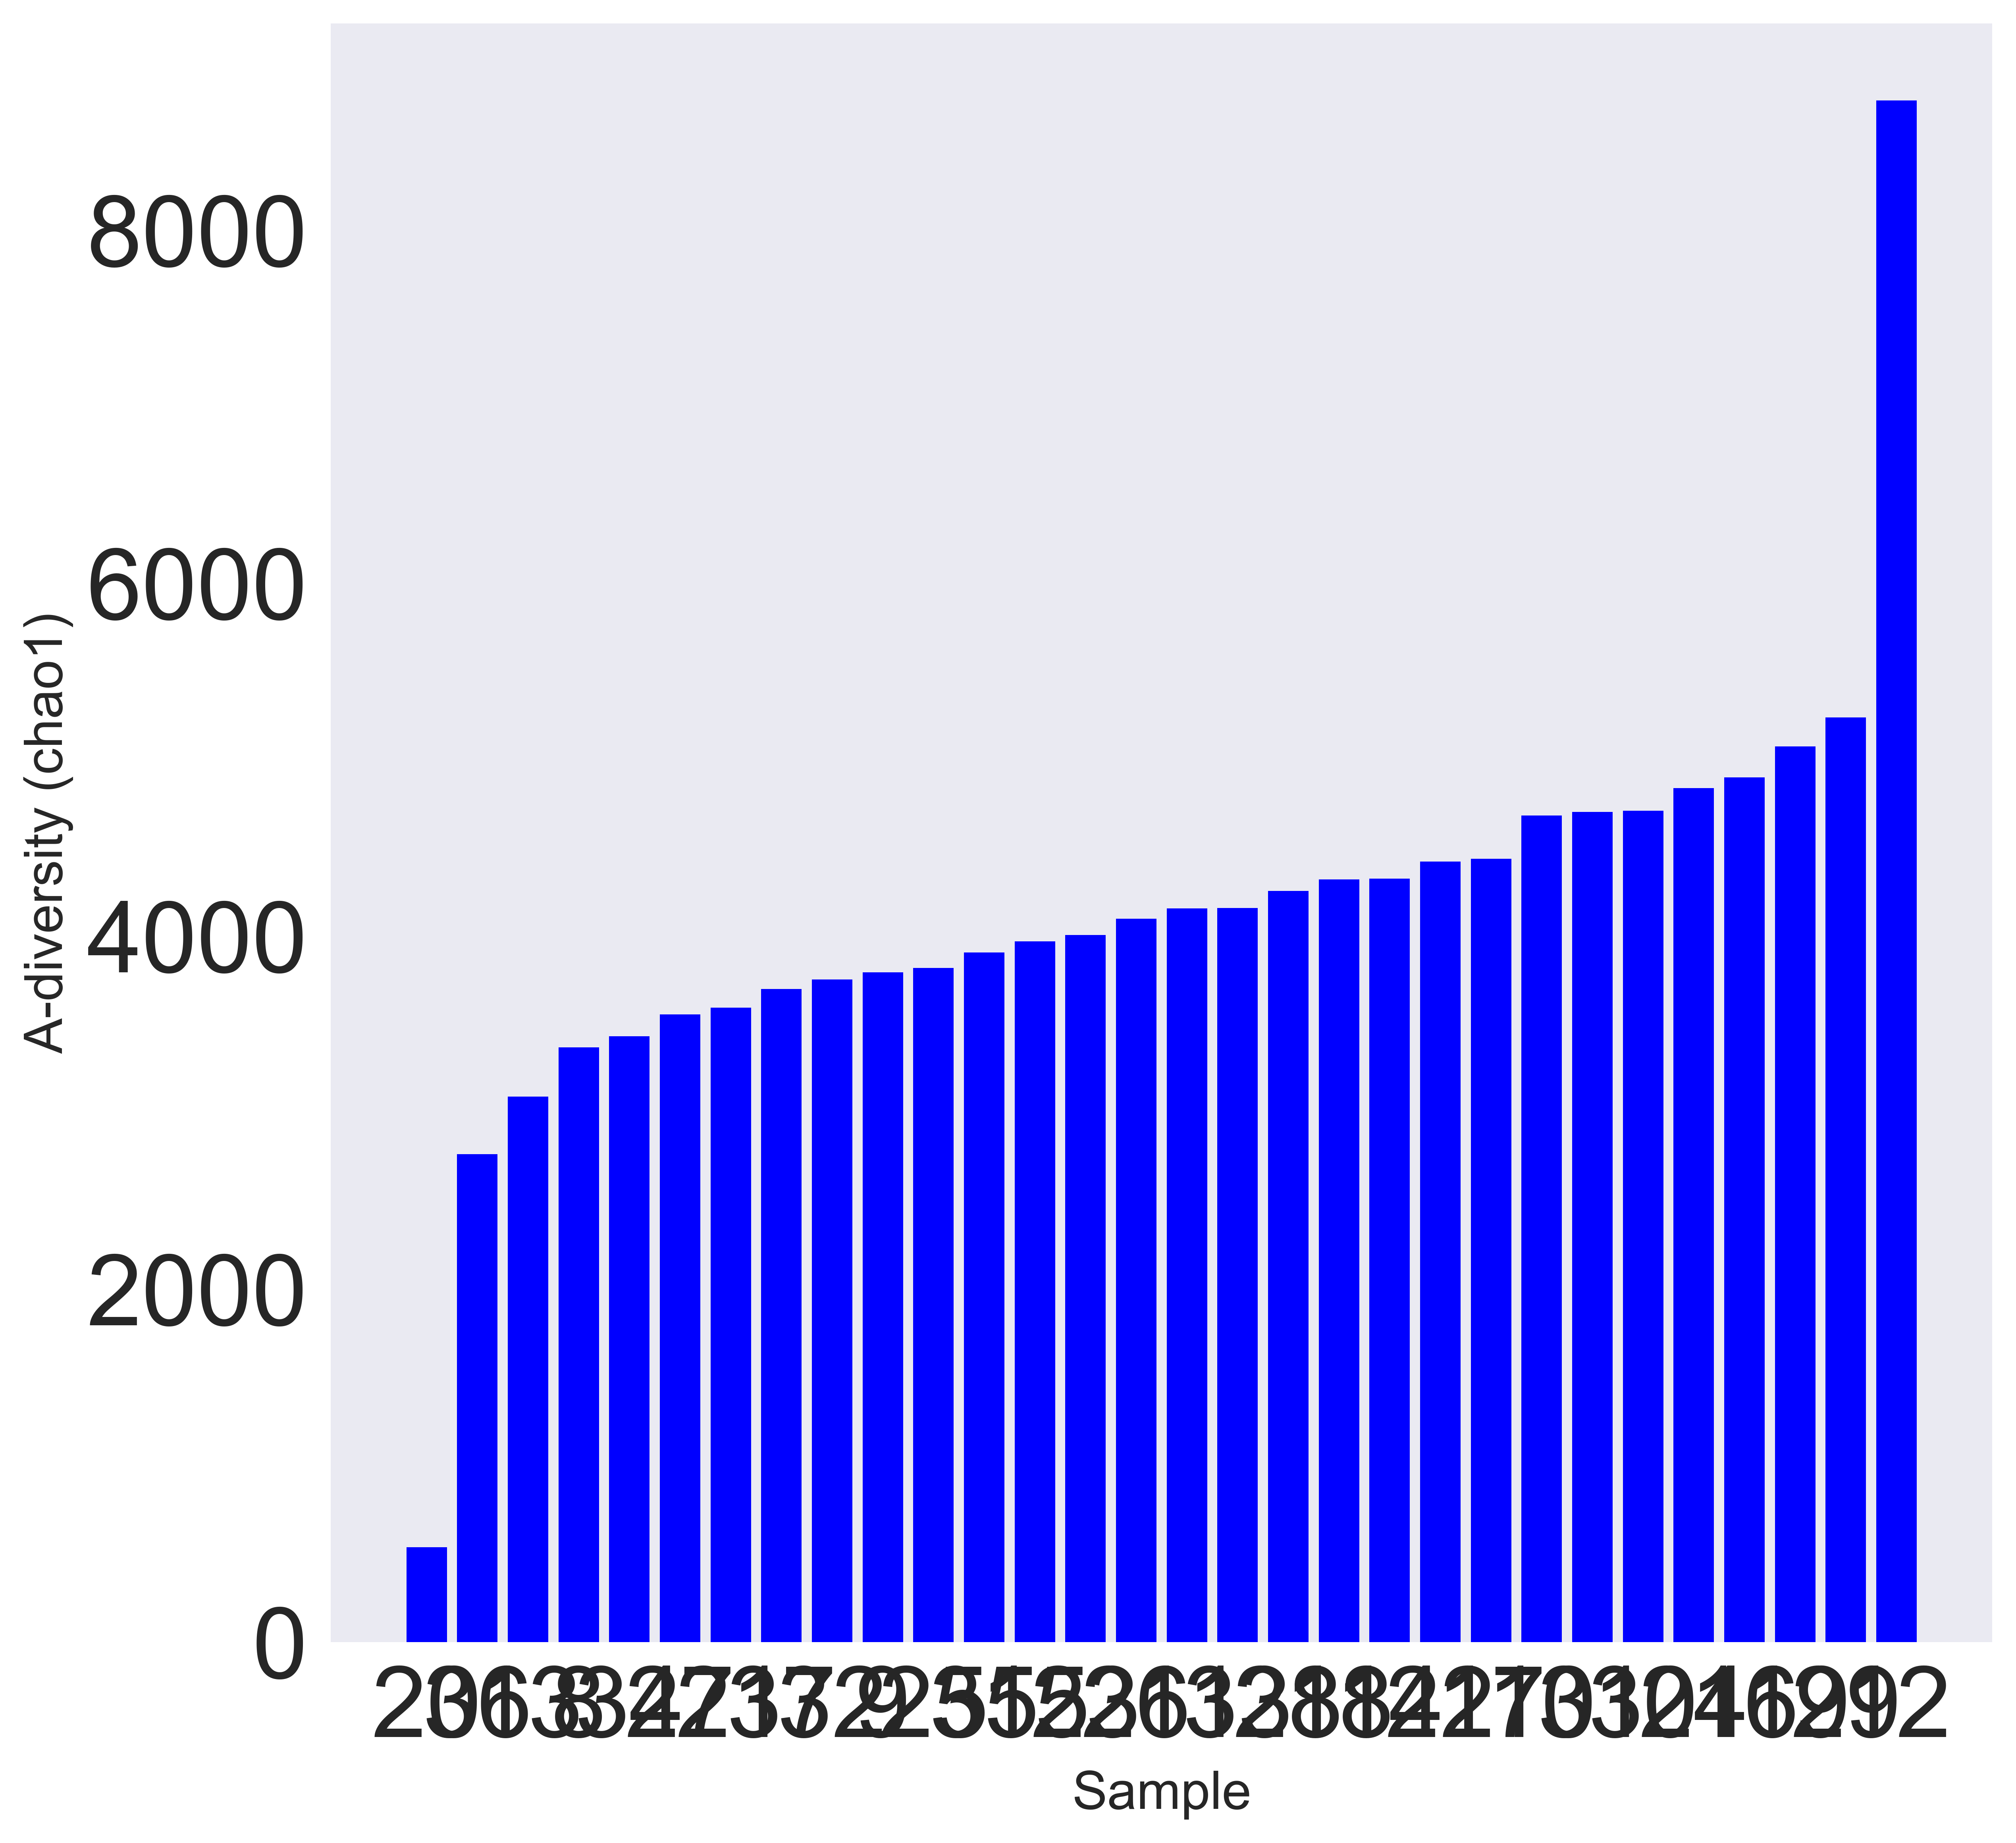

In [68]:
fig = plt.figure(figsize=(9, 9), dpi=600)
ax = plt.subplot(111)

x = np.arange(0, 30, 1)
xticks = data.sample_num
ax.bar(x, data['chao1_alpha'].values, facecolor='blue')
plt.xticks(x, xticks)

plt.xlabel('Sample', fontsize =16)
plt.ylabel('A-diversity (chao1)', fontsize =16)
plt.grid(False)

plt.show()

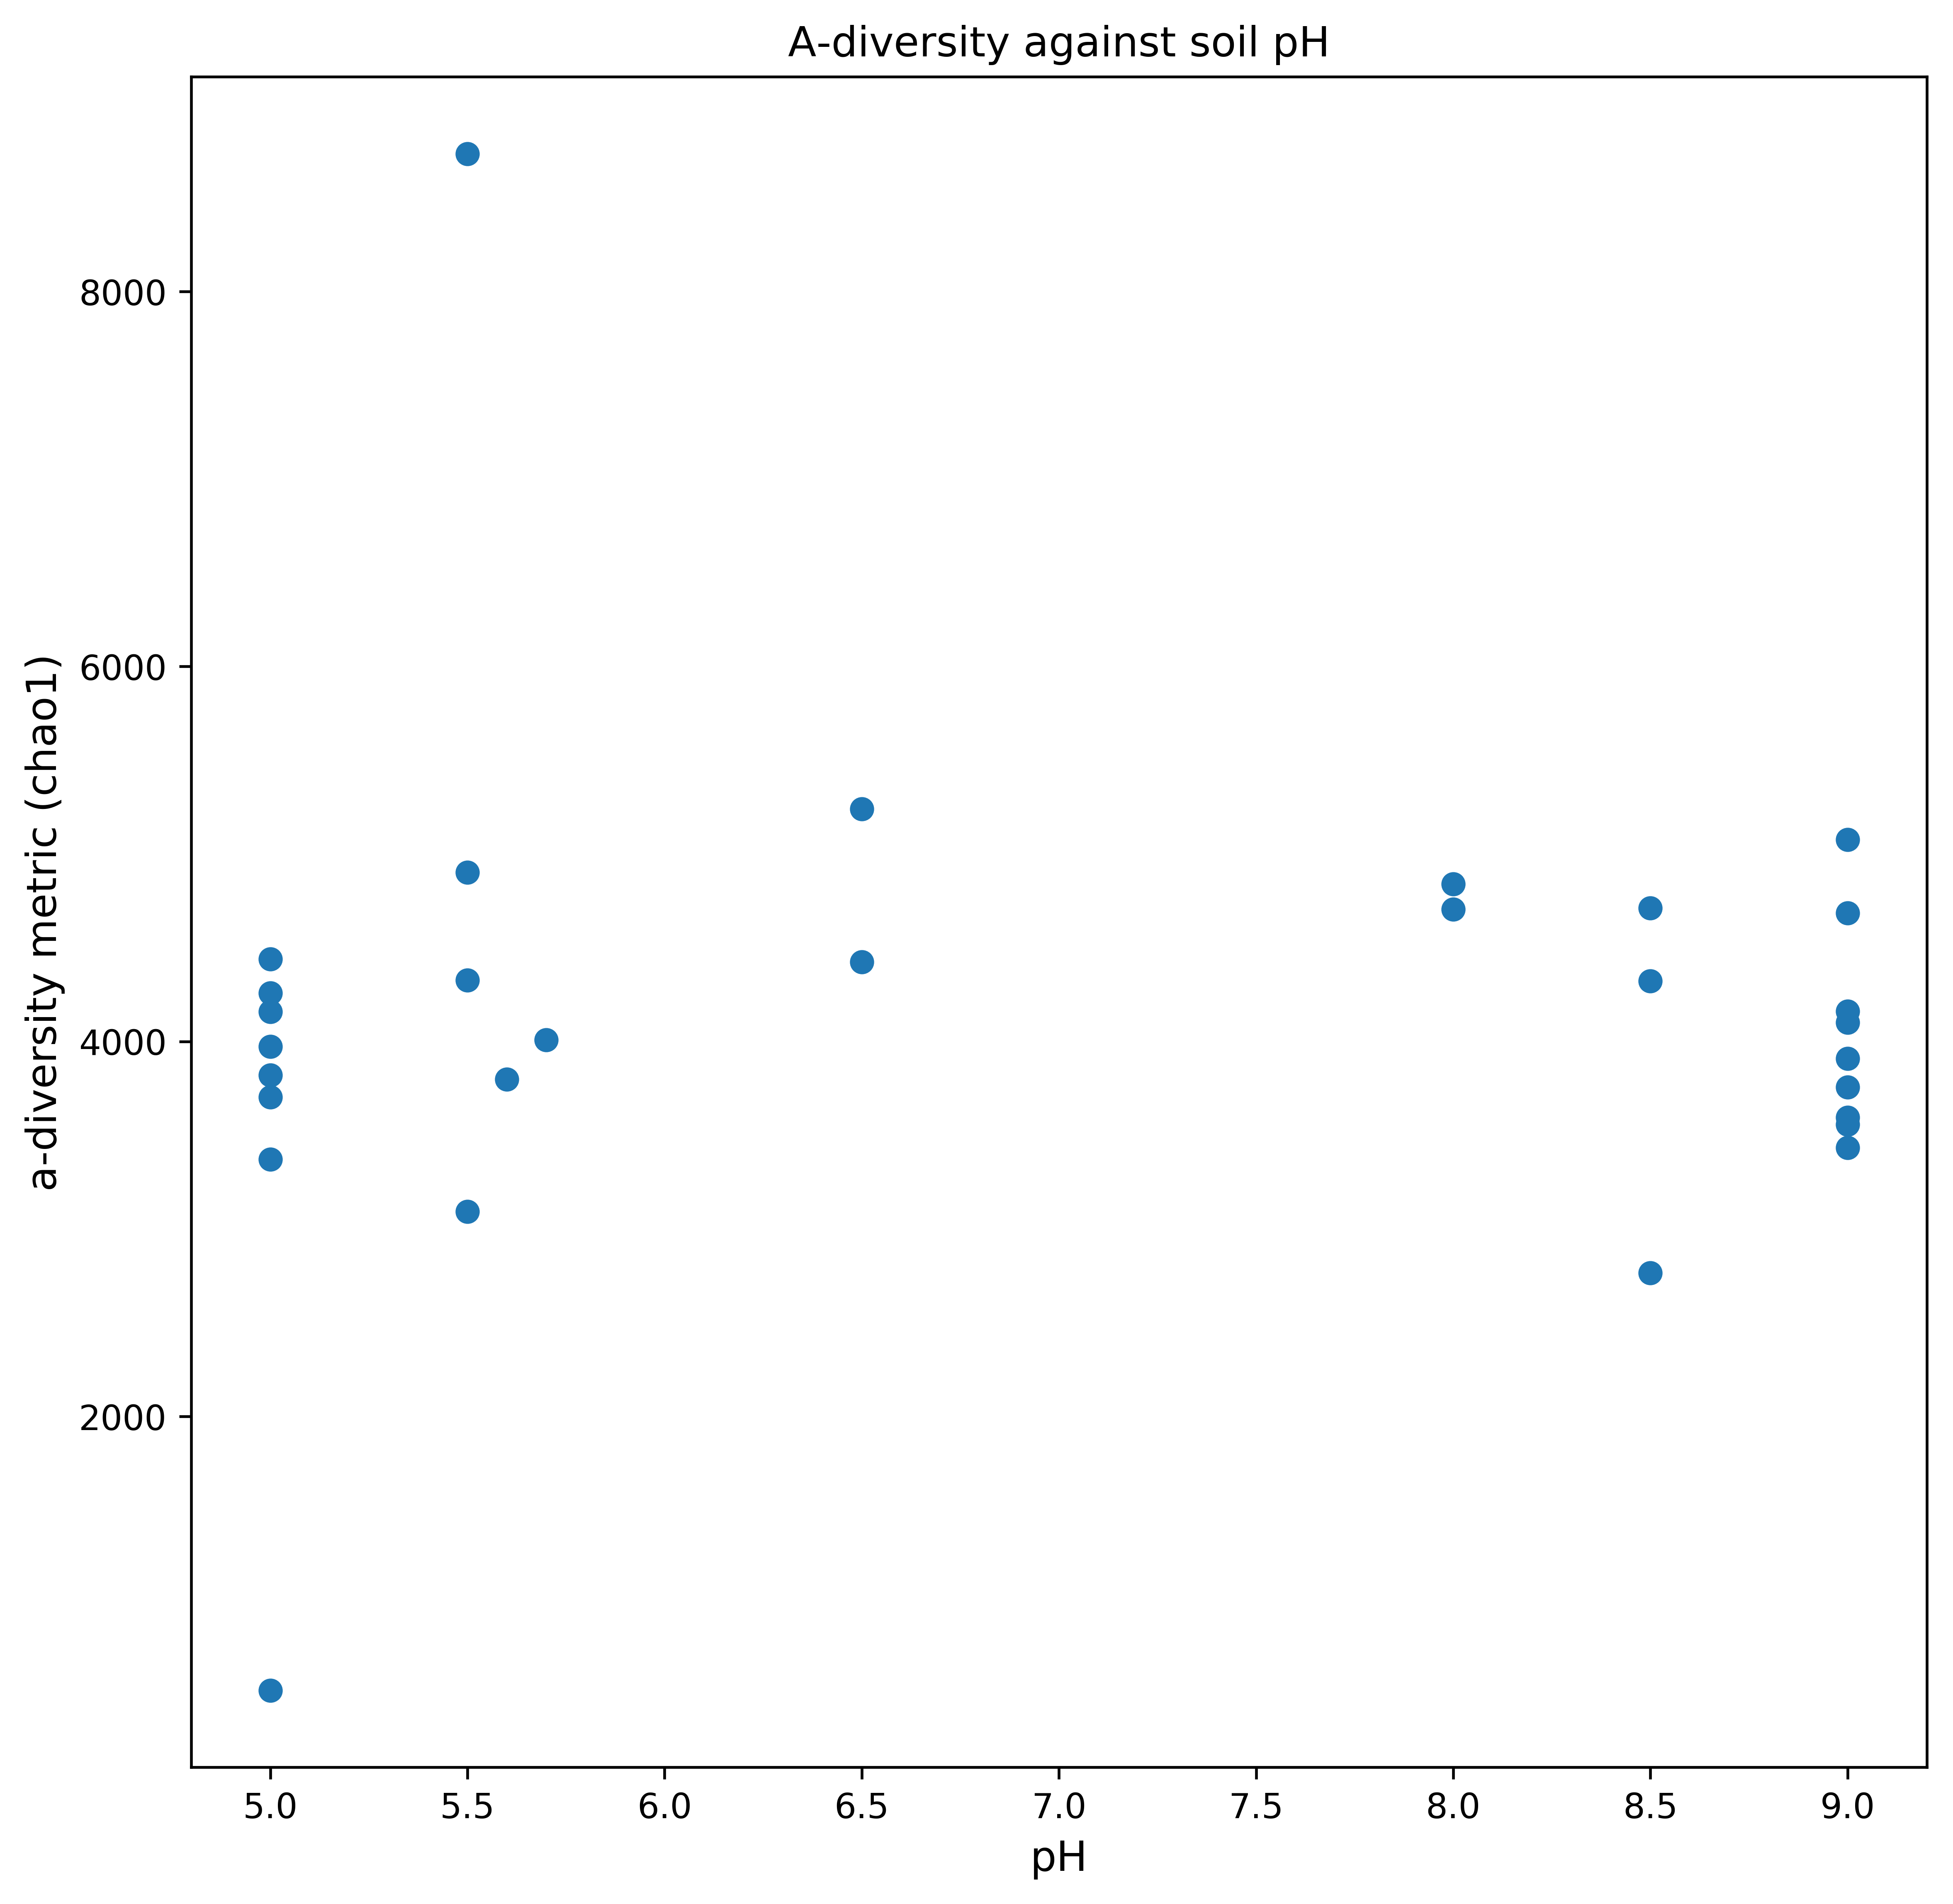

In [6]:
#plot a-diversity against pH 
fig, axis = plt.subplots(figsize=(9,9), dpi=600)

X = data['SamplePh']
Y = data['chao1_alpha']

axis.set_title('A-diversity against soil pH',fontsize=12)
axis.set_xlabel('pH',fontsize=12)
axis.set_ylabel('a-diversity metric (chao1)',fontsize=12)
axis.scatter(X, Y)
plt.show()

In [39]:
low_phos_mask = data['SamplePhosphorus'].str.contains('Trace|Low|Medium')
low_phos_data = data[low_phos_mask]
low_phos_data


,#SampleID,SampleMoisture,SamplePotassium,SampleNitrogen,SamplePhosphorus,SamplePh,chao1_alpha,chao1_normalized_alpha
1,515rcbc9,dry,Trace,Trace,Low,5.6,3797.094891,0.397595
2,515rcbc10,dry,Trace,Medium,Medium,9.0,4685.031056,0.505905
4,515rcbc12,moist,Medium,Trace,Medium,5.5,8735.655172,1.000000
5,515rcbc13,moist,Low,Low,Medium,5.5,3091.626741,0.311542
6,515rcbc14,dry,Trace,Trace,Low,5.5,4326.063636,0.462119
7,515rcbc15,moist,Medium,Trace,Medium,5.0,3971.686567,0.418892
8,515rcbc16,moist,Trace,Trace,Low,5.5,4901.435754,0.532302
9,515rcbc17,dry,Medium,Trace,Low,5.0,4438.887500,0.475881
10,515rcbc18,moist,Trace,Low,Medium,8.5,4321.581545,0.461572
11,515rcbc19,dry,Low,Low,Medium,9.0,5075.655311,0.553554


In [41]:
high_phos_mask = data['SamplePhosphorus'].str.contains('Medium|High')
high_phos_data = data[high_phos_mask]

high_phos_data
high_phos_data.drop(high_phos_data.index[14])

,#SampleID,SampleMoisture,SamplePotassium,SampleNitrogen,SamplePhosphorus,SamplePh,chao1_alpha,chao1_normalized_alpha
0,515rcbc8,dry,Medium,Trace,High,5.0,3370.875862,0.345605
2,515rcbc10,dry,Trace,Medium,Medium,9.0,4685.031056,0.505905
3,515rcbc11,moist,Trace,Low,High,5.0,4157.582524,0.441567
4,515rcbc12,moist,Medium,Trace,Medium,5.5,8735.655172,1.000000
5,515rcbc13,moist,Low,Low,Medium,5.5,3091.626741,0.311542
7,515rcbc15,moist,Medium,Trace,Medium,5.0,3971.686567,0.418892
10,515rcbc18,moist,Trace,Low,Medium,8.5,4321.581545,0.461572
11,515rcbc19,dry,Low,Low,Medium,9.0,5075.655311,0.553554
12,515rcbc20,dry,Medium-High,High,High,5.0,537.581081,0.000000
14,515rcbc22,moist,Low,Trace,Medium,6.5,4424.165116,0.474085


In [44]:
print low_phos_data['chao1_alpha'].mean(), high_phos_data['chao1_alpha'].mean()

4308.45792578 4169.80066016


In [45]:
ttest_ind(low_phos_data['chao1_alpha'], high_phos_data['chao1_alpha'])

Ttest_indResult(statistic=0.36465628456247401, pvalue=0.71711482163614504)

## Analysis of beta-diversity matrix 

In [162]:
unifrac_df = pd.read_csv('~/Documents/bioc3301_project/ngs_data/core_div/bdiv_even600/unweighted_unifrac_dm.txt', sep='\t')

unifrac_df=unifrac_df.rename(columns = {'Unnamed: 0':'Samples'})
unifrac_df.set_index('Samples', inplace=True)
unifrac_df




,515rcbc9,515rcbc8,515rcbc19,515rcbc18,515rcbc37,515rcbc10,515rcbc35,515rcbc12,515rcbc33,515rcbc14,...,515rcbc22,515rcbc23,515rcbc24,515rcbc25,515rcbc26,515rcbc27,515rcbc28,515rcbc29,515rcbc16,515rcbc31
Samples,,,,,,,,,,,,,,,,,,,,,
515rcbc9,0.000000,0.626806,0.586904,0.603053,0.589583,0.590572,0.601475,0.655145,0.562209,0.566228,...,0.596972,0.564357,0.584039,0.656651,0.647574,0.563832,0.587861,0.575724,0.588927,0.590540
515rcbc8,0.626806,0.000000,0.630071,0.654016,0.609611,0.639392,0.650546,0.684529,0.618059,0.656245,...,0.666252,0.632268,0.677998,0.626895,0.685311,0.640781,0.636720,0.640457,0.619108,0.559438
515rcbc19,0.586904,0.630071,0.000000,0.635694,0.580691,0.614116,0.643105,0.636291,0.584957,0.608985,...,0.614216,0.585521,0.640071,0.639802,0.674562,0.595149,0.603653,0.580032,0.596030,0.578864
515rcbc18,0.603053,0.654016,0.635694,0.000000,0.609676,0.579520,0.602654,0.642880,0.585625,0.581993,...,0.582938,0.602802,0.593435,0.696438,0.592379,0.604965,0.599304,0.593197,0.621623,0.627689
515rcbc37,0.589583,0.609611,0.580691,0.609676,0.000000,0.604581,0.625501,0.620369,0.598249,0.557691,...,0.630714,0.569384,0.613657,0.666641,0.641666,0.583958,0.592153,0.582920,0.597314,0.586977
515rcbc10,0.590572,0.639392,0.614116,0.579520,0.604581,0.000000,0.603412,0.670460,0.580834,0.629268,...,0.602733,0.612129,0.613893,0.642924,0.604962,0.605217,0.610419,0.585590,0.596130,0.583777
515rcbc35,0.601475,0.650546,0.643105,0.602654,0.625501,0.603412,0.000000,0.689240,0.621101,0.642557,...,0.633294,0.639349,0.644967,0.703105,0.610078,0.619096,0.612396,0.625883,0.640013,0.621932
515rcbc12,0.655145,0.684529,0.636291,0.642880,0.620369,0.670460,0.689240,0.000000,0.649530,0.625949,...,0.623214,0.609195,0.647017,0.724101,0.673318,0.606092,0.659867,0.652266,0.649854,0.654711
515rcbc33,0.562209,0.618059,0.584957,0.585625,0.598249,0.580834,0.621101,0.649530,0.000000,0.563413,...,0.592213,0.572539,0.604677,0.648588,0.598582,0.583583,0.593328,0.586571,0.576045,0.601145


In [11]:
unifrac_df.shape

(30, 30)

In [111]:
# mean distance between samples 
unifrac_df['mean'] = unifrac_df.mean(axis=1)
unifrac_df.sort_values('mean', ascending=False)

new_ind = []
for i in unifrac_df.index: 
    x = i[7:]
    
    new_ind.append(x)



# unifrac_df.index = unifrac_df['new_ind']
# unifrac_df


In [156]:
unifrac_df.index = new_ind
unifrac_df.sort_index(inplace=True)
unifrac_df
# unifrac_df = unifrac_df.sort_values(unifrac_df.index, ascending=True)
# unifrac_df

,Samples,515rcbc9,515rcbc8,515rcbc19,515rcbc18,515rcbc37,515rcbc10,515rcbc35,515rcbc12,515rcbc33,...,515rcbc22,515rcbc23,515rcbc24,515rcbc25,515rcbc26,515rcbc27,515rcbc28,515rcbc29,515rcbc16,515rcbc31
10,515rcbc10,0.590572,0.639392,0.614116,0.579520,0.604581,0.000000,0.603412,0.670460,0.580834,...,0.602733,0.612129,0.613893,0.642924,0.604962,0.605217,0.610419,0.585590,0.596130,0.583777
11,515rcbc11,0.621974,0.594288,0.572596,0.643770,0.555022,0.609993,0.655333,0.655897,0.593583,...,0.631751,0.601734,0.636002,0.617435,0.678733,0.623063,0.641527,0.609607,0.600408,0.563106
12,515rcbc12,0.655145,0.684529,0.636291,0.642880,0.620369,0.670460,0.689240,0.000000,0.649530,...,0.623214,0.609195,0.647017,0.724101,0.673318,0.606092,0.659867,0.652266,0.649854,0.654711
13,515rcbc13,0.573005,0.616244,0.602706,0.566738,0.597902,0.576602,0.593313,0.640220,0.570187,...,0.553855,0.593617,0.600705,0.666940,0.591195,0.552006,0.586415,0.584380,0.608630,0.613990
14,515rcbc14,0.566228,0.656245,0.608985,0.581993,0.557691,0.629268,0.642557,0.625949,0.563413,...,0.578282,0.592575,0.594822,0.678173,0.631121,0.561979,0.588315,0.604769,0.595827,0.625814
15,515rcbc15,0.612299,0.644490,0.612792,0.562570,0.591145,0.603714,0.607825,0.639794,0.572978,...,0.569468,0.624970,0.580168,0.684727,0.604665,0.563010,0.562588,0.585094,0.632705,0.623386
16,515rcbc16,0.588927,0.619108,0.596030,0.621623,0.597314,0.596130,0.640013,0.649854,0.576045,...,0.619338,0.609327,0.630857,0.638226,0.674960,0.603100,0.607259,0.606547,0.000000,0.572254
17,515rcbc17,0.593275,0.641910,0.617964,0.553061,0.567524,0.587777,0.585184,0.646394,0.585051,...,0.603885,0.618673,0.579255,0.691813,0.601348,0.561365,0.590544,0.577911,0.608339,0.597626
18,515rcbc18,0.603053,0.654016,0.635694,0.000000,0.609676,0.579520,0.602654,0.642880,0.585625,...,0.582938,0.602802,0.593435,0.696438,0.592379,0.604965,0.599304,0.593197,0.621623,0.627689
19,515rcbc19,0.586904,0.630071,0.000000,0.635694,0.580691,0.614116,0.643105,0.636291,0.584957,...,0.614216,0.585521,0.640071,0.639802,0.674562,0.595149,0.603653,0.580032,0.596030,0.578864


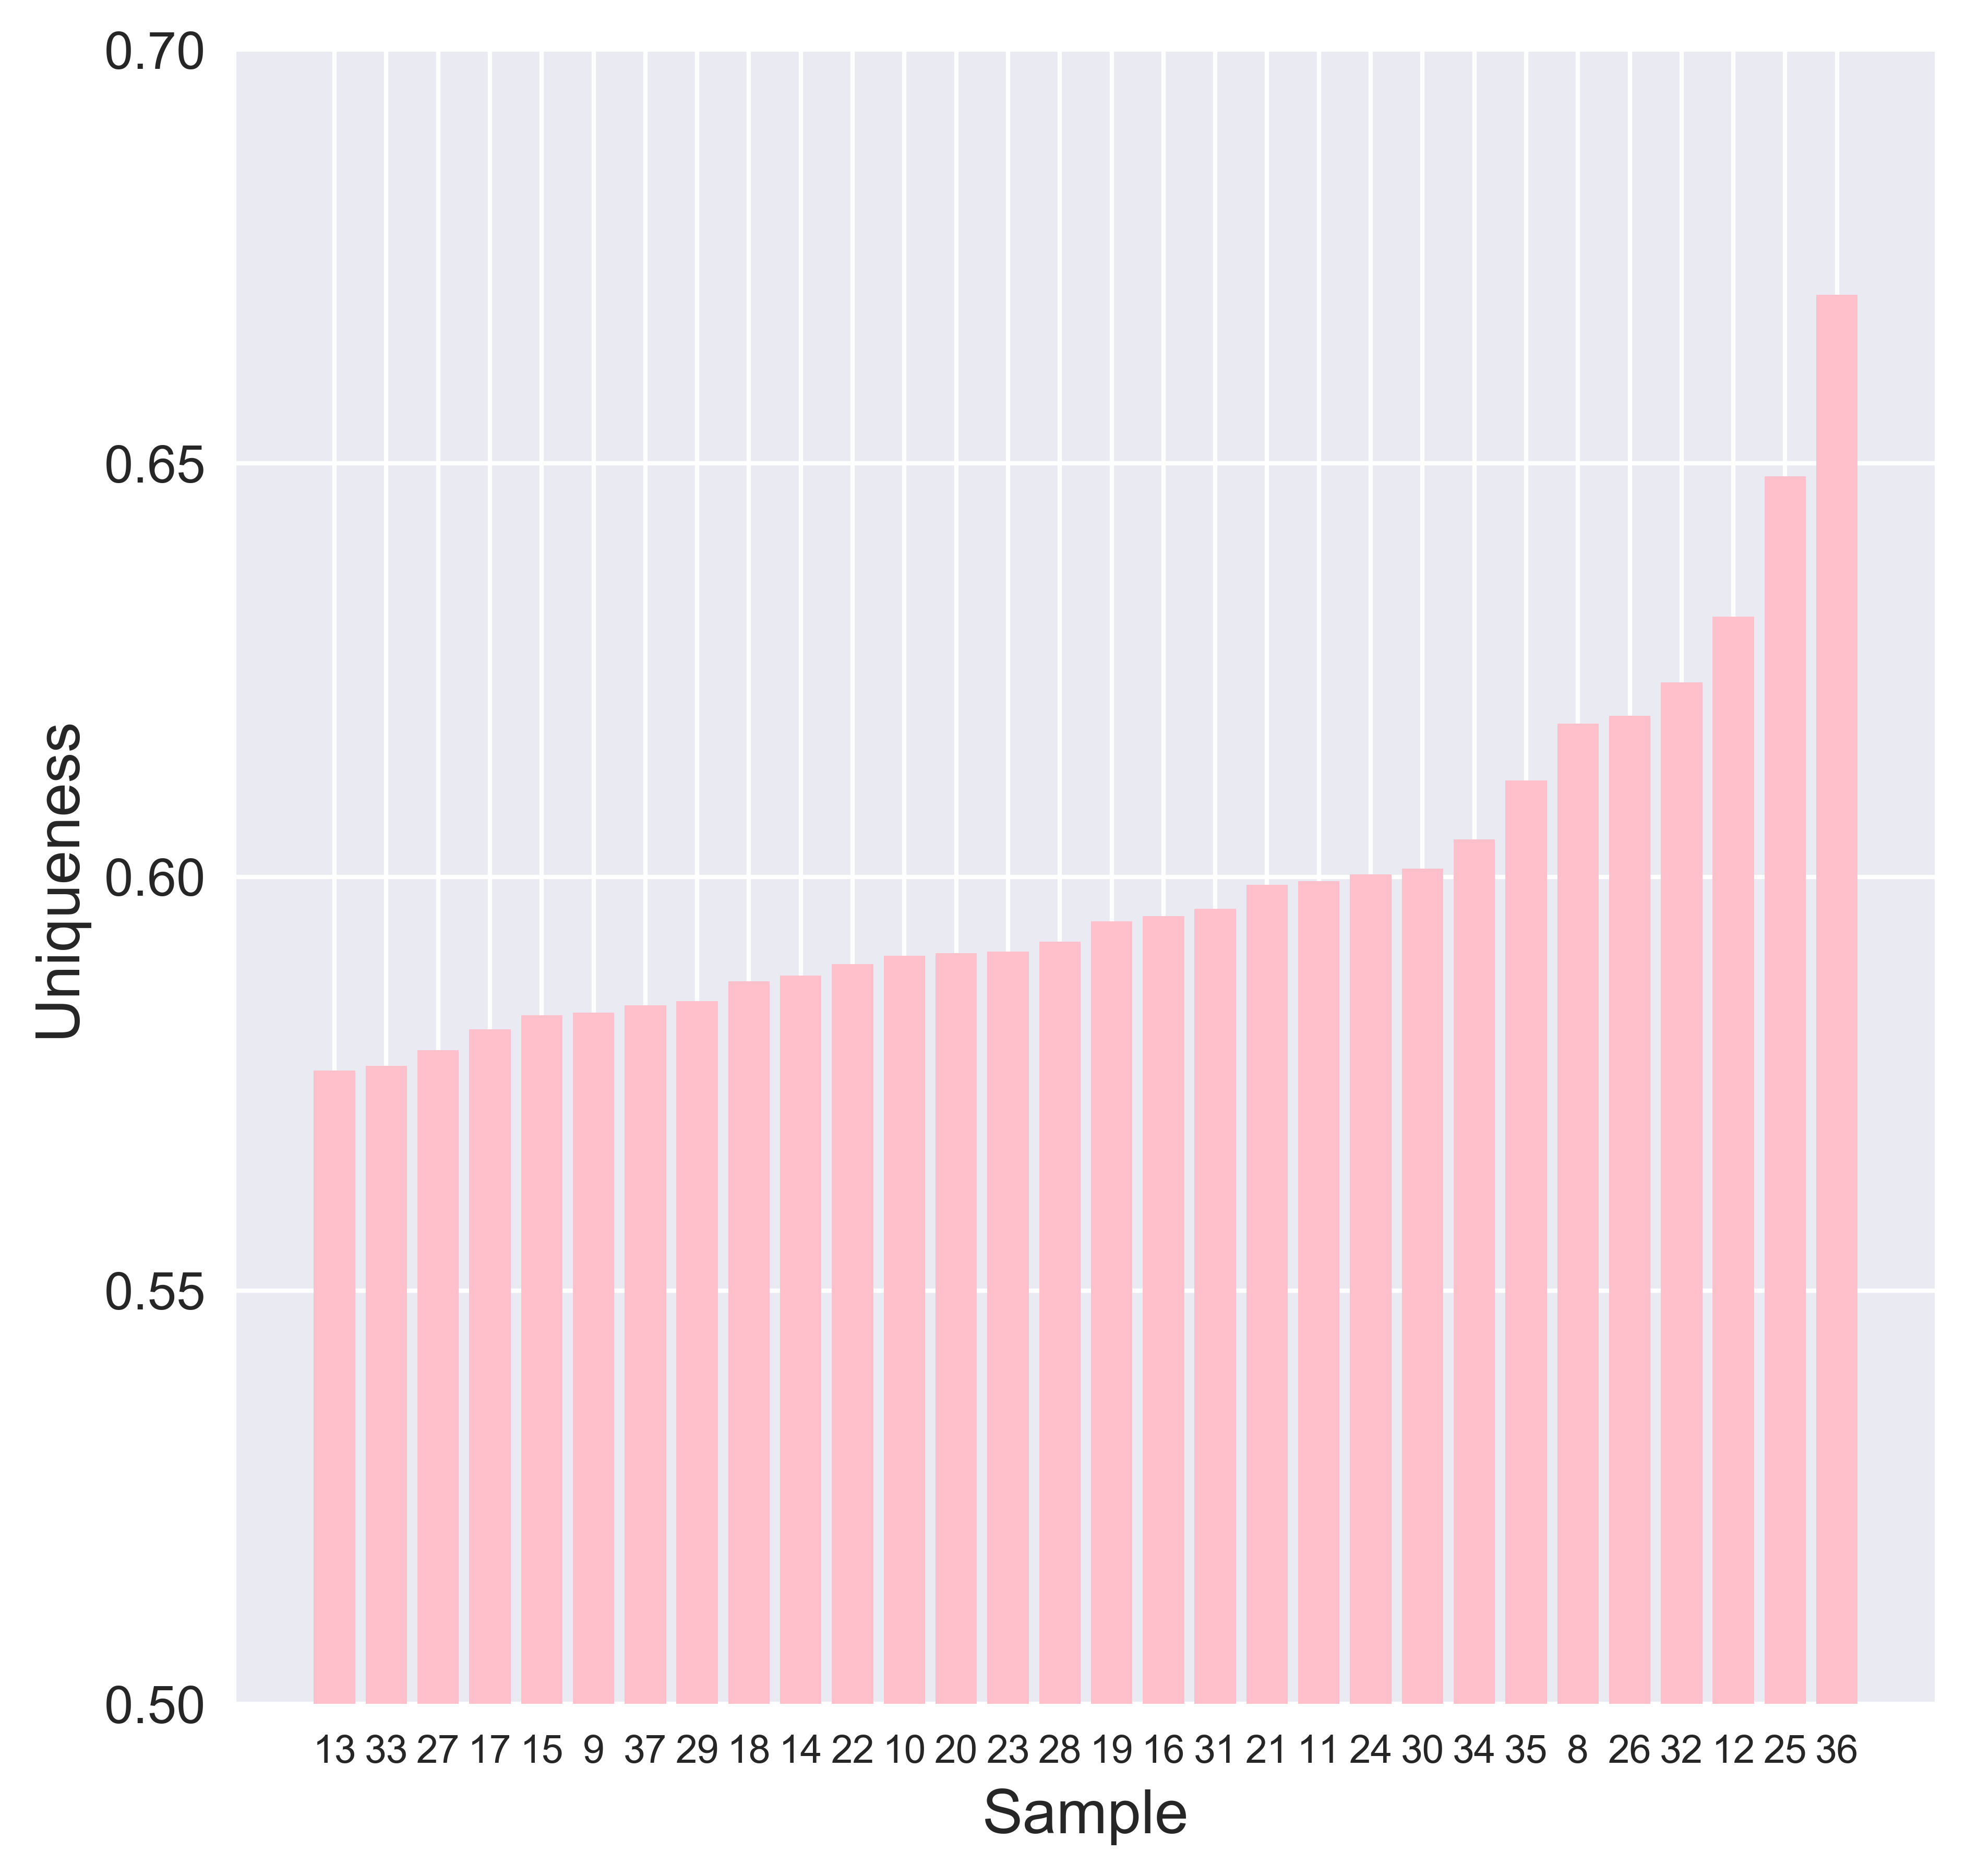

In [139]:
fig = plt.figure(figsize=(7, 7), dpi=600)
ax = plt.subplot(111)

x = np.arange(0, 30, 1)
xticks = unifrac_df.index
ax.bar(x, unifrac_df['mean'].values, facecolor='pink')
plt.xticks(x, xticks, fontsize=9)
plt.yticks(fontsize=12)
ax.set_ylim([0.5, 0.7])

plt.xlabel('Sample', fontsize =14)
plt.ylabel('Uniqueness', fontsize =14)
plt.grid(True)

plt.show()

In [163]:
l = []
s = []
for i in unifrac_df.columns:
    
    max_dist = unifrac_df[i].idxmax()
    ph_1 = data['SamplePh'].loc[i]
    ph_2 = data['SamplePh'].loc[max_dist]
    delta_ph = abs(ph_1 - ph_2)
    l.append(delta_ph)
    
    unifrac_df[i][unifrac_df[i].idxmin()] = unifrac_df[i].mean()
    
    min_dist = unifrac_df[i].idxmin
    ph_2 = data['SamplePh'].loc[min_dist]
    delta_ph = abs(ph_1 - ph_2)
    s.append(delta_ph)

ttest_ind(l, s)


  

Ttest_indResult(statistic=-1.681212618178088, pvalue=0.098099576143420186)

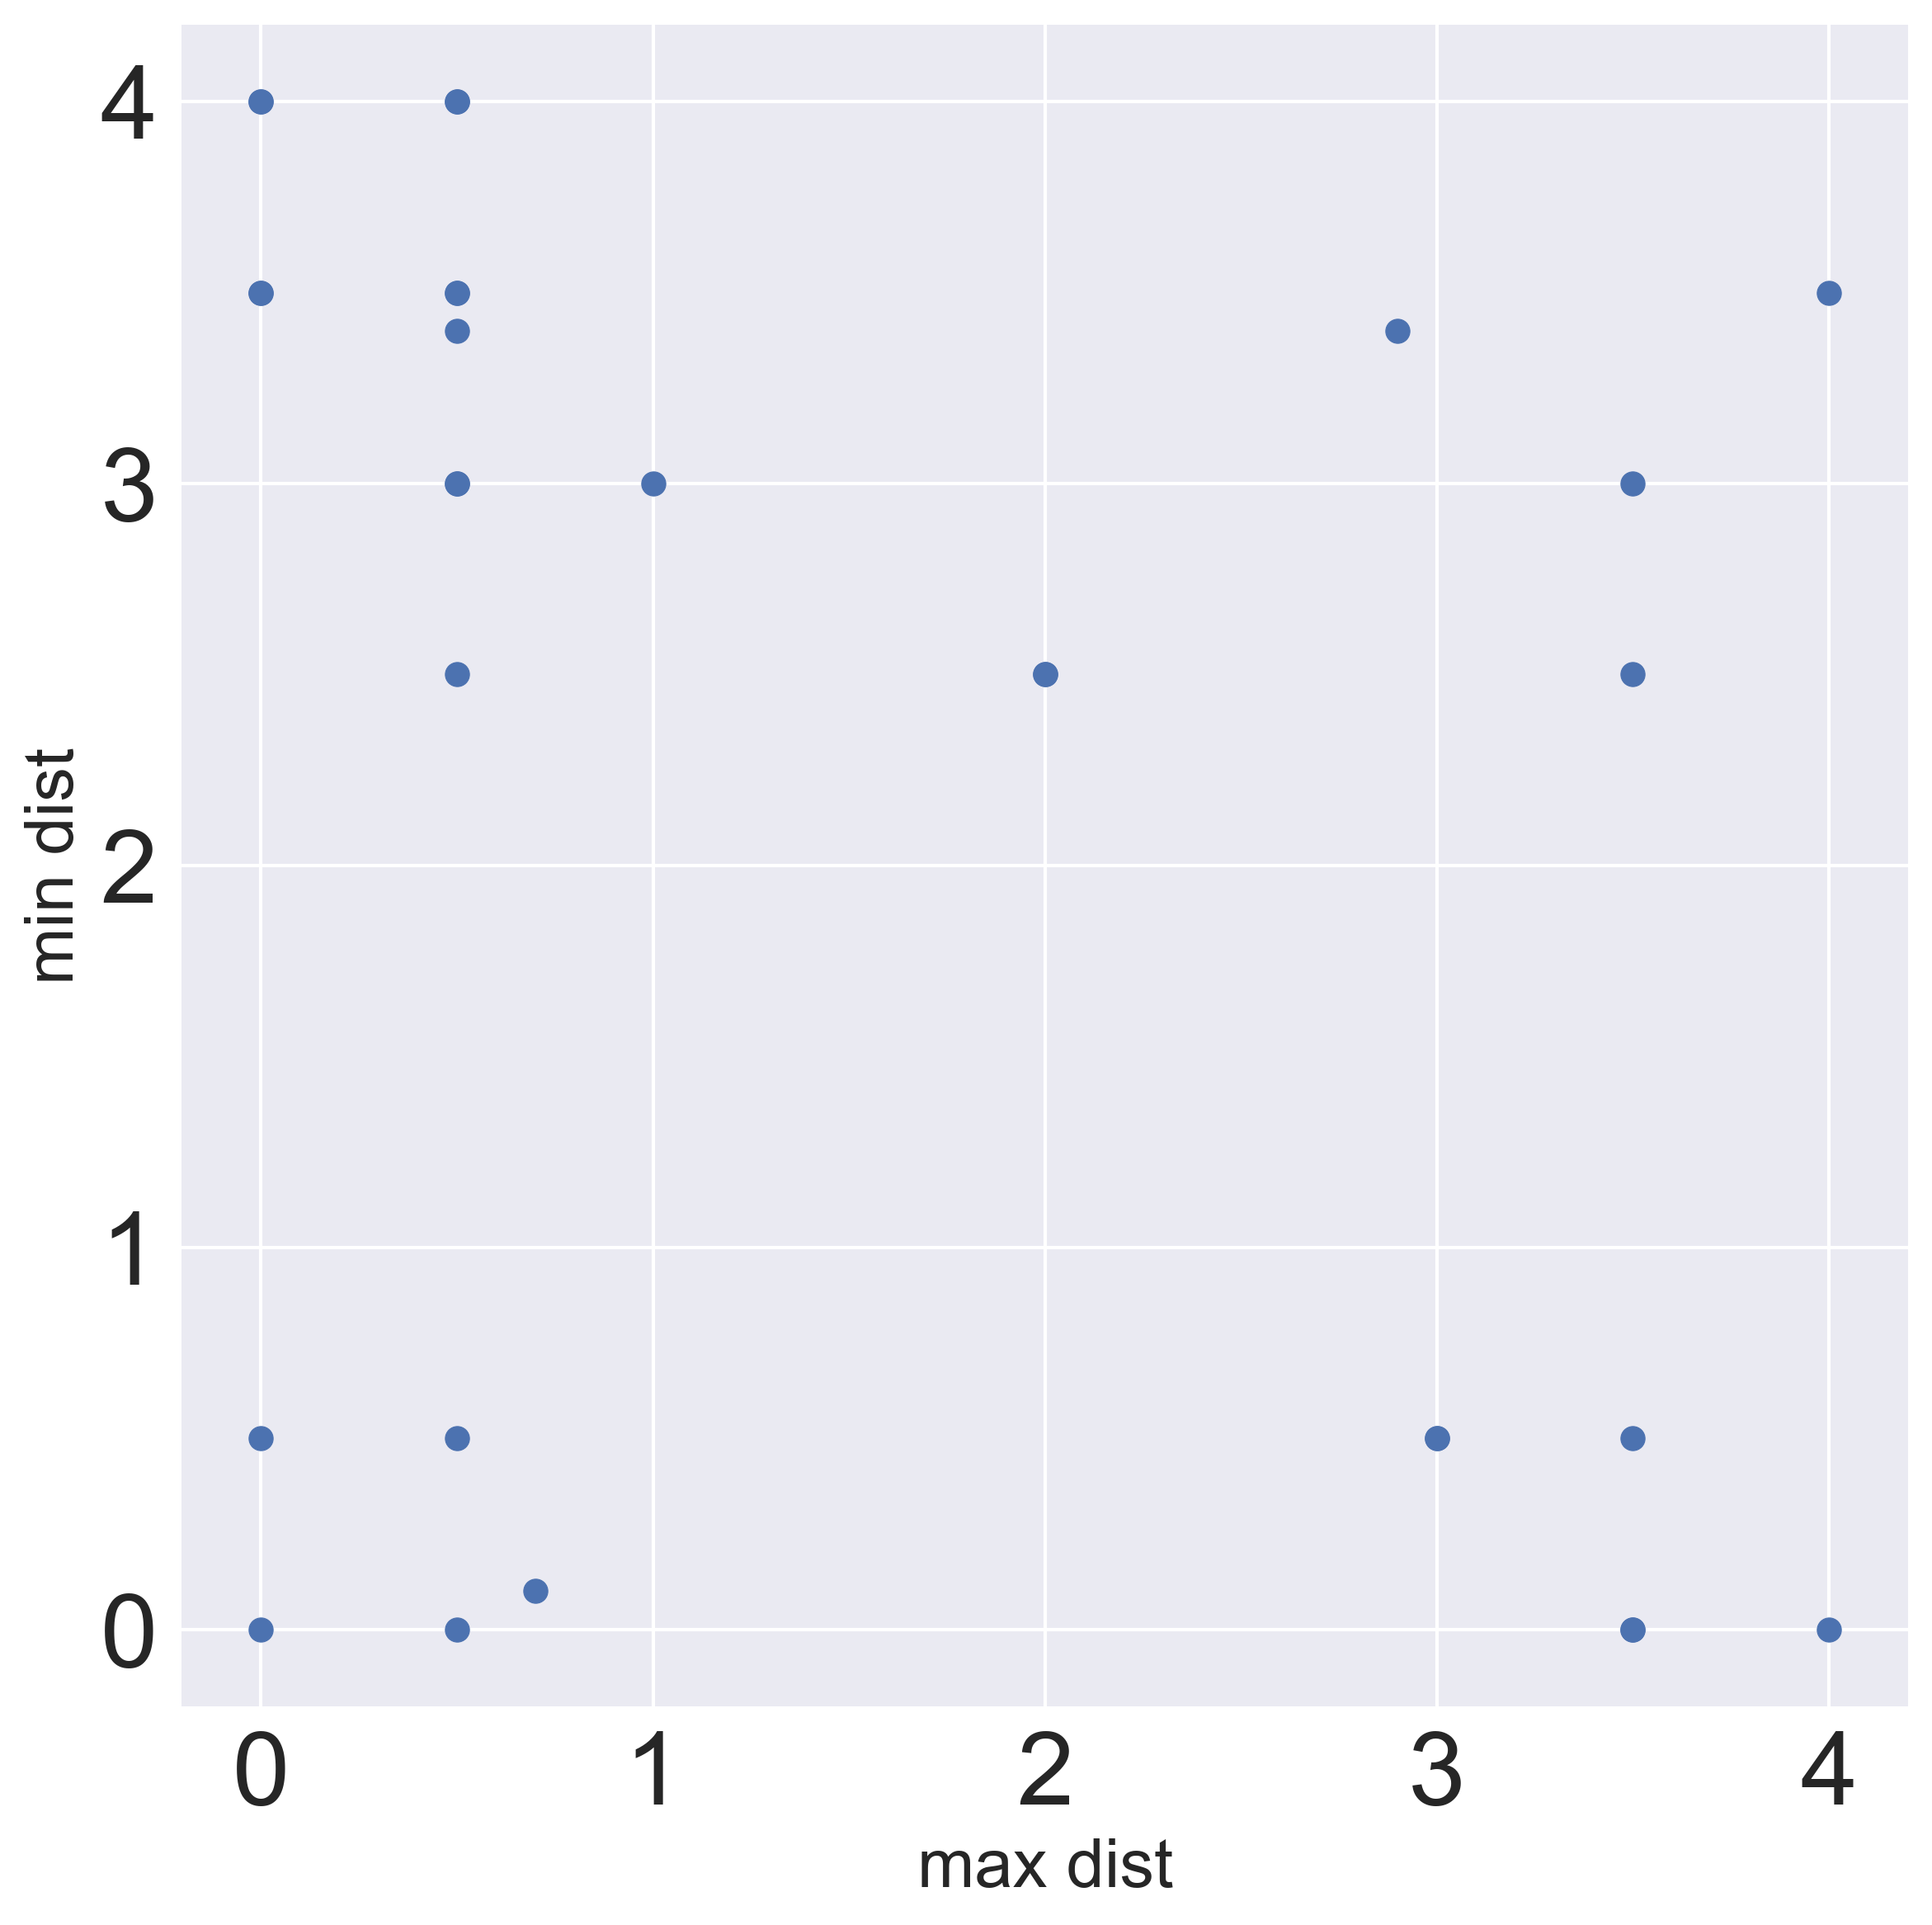

In [166]:
#scatter plot 

fig, axis = plt.subplots(figsize=(9,9), dpi=300)

X = l
Y = s


axis.set_xlabel('max dist',fontsize=20)
axis.set_ylabel('min dist',fontsize=20)
axis.scatter(X, Y)
# plt.axvline(7.0, linewidth=45, color = 'red', alpha = 0.3)
plt.show()

In [32]:
tax_data = pd.read_csv('~/Documents/bioc3301_project/ngs_data/taxa_sum/table_even600_L2.txt', sep='\t', index_col=0, header=1)
tax_data=tax_data.rename(columns = {'# Constructed from biom file':'Phyla'})

for i in tax_data.columns:
    mask = tax_data[i] > 0.035
    tax_data_high = tax_data[mask]
tax_data_high


,515rcbc32,515rcbc25,515rcbc16,515rcbc34,515rcbc29,515rcbc11,515rcbc31,515rcbc33,515rcbc10,515rcbc9,...,515rcbc14,515rcbc35,515rcbc18,515rcbc13,515rcbc36,515rcbc15,515rcbc24,515rcbc21,515rcbc26,515rcbc20
#OTUID,,,,,,,,,,,,,,,,,,,,,
D_0__Bacteria;D_1__Acidobacteria,0.218333,0.210000,0.160000,0.178333,0.163333,0.161667,0.201667,0.136667,0.205000,0.190000,...,0.145000,0.240000,0.221667,0.176667,0.048333,0.175000,0.208333,0.205000,0.230000,0.171667
D_0__Bacteria;D_1__Actinobacteria,0.086667,0.175000,0.128333,0.166667,0.205000,0.101667,0.088333,0.156667,0.126667,0.130000,...,0.118333,0.110000,0.160000,0.110000,0.176667,0.240000,0.163333,0.073333,0.100000,0.158333
D_0__Bacteria;D_1__Bacteroidetes,0.068333,0.086667,0.106667,0.063333,0.075000,0.086667,0.096667,0.066667,0.086667,0.071667,...,0.120000,0.046667,0.038333,0.110000,0.240000,0.065000,0.063333,0.073333,0.036667,0.115000
D_0__Bacteria;D_1__Planctomycetes,0.041667,0.058333,0.041667,0.050000,0.043333,0.040000,0.036667,0.056667,0.051667,0.038333,...,0.050000,0.043333,0.061667,0.053333,0.068333,0.053333,0.040000,0.098333,0.076667,0.045000
D_0__Bacteria;D_1__Proteobacteria,0.300000,0.188333,0.275000,0.266667,0.283333,0.373333,0.365000,0.263333,0.250000,0.250000,...,0.238333,0.275000,0.238333,0.298333,0.358333,0.226667,0.236667,0.280000,0.243333,0.305000
D_0__Bacteria;D_1__Verrucomicrobia,0.160000,0.198333,0.178333,0.078333,0.073333,0.145000,0.113333,0.191667,0.100000,0.145000,...,0.196667,0.070000,0.108333,0.081667,0.051667,0.066667,0.110000,0.141667,0.090000,0.095000


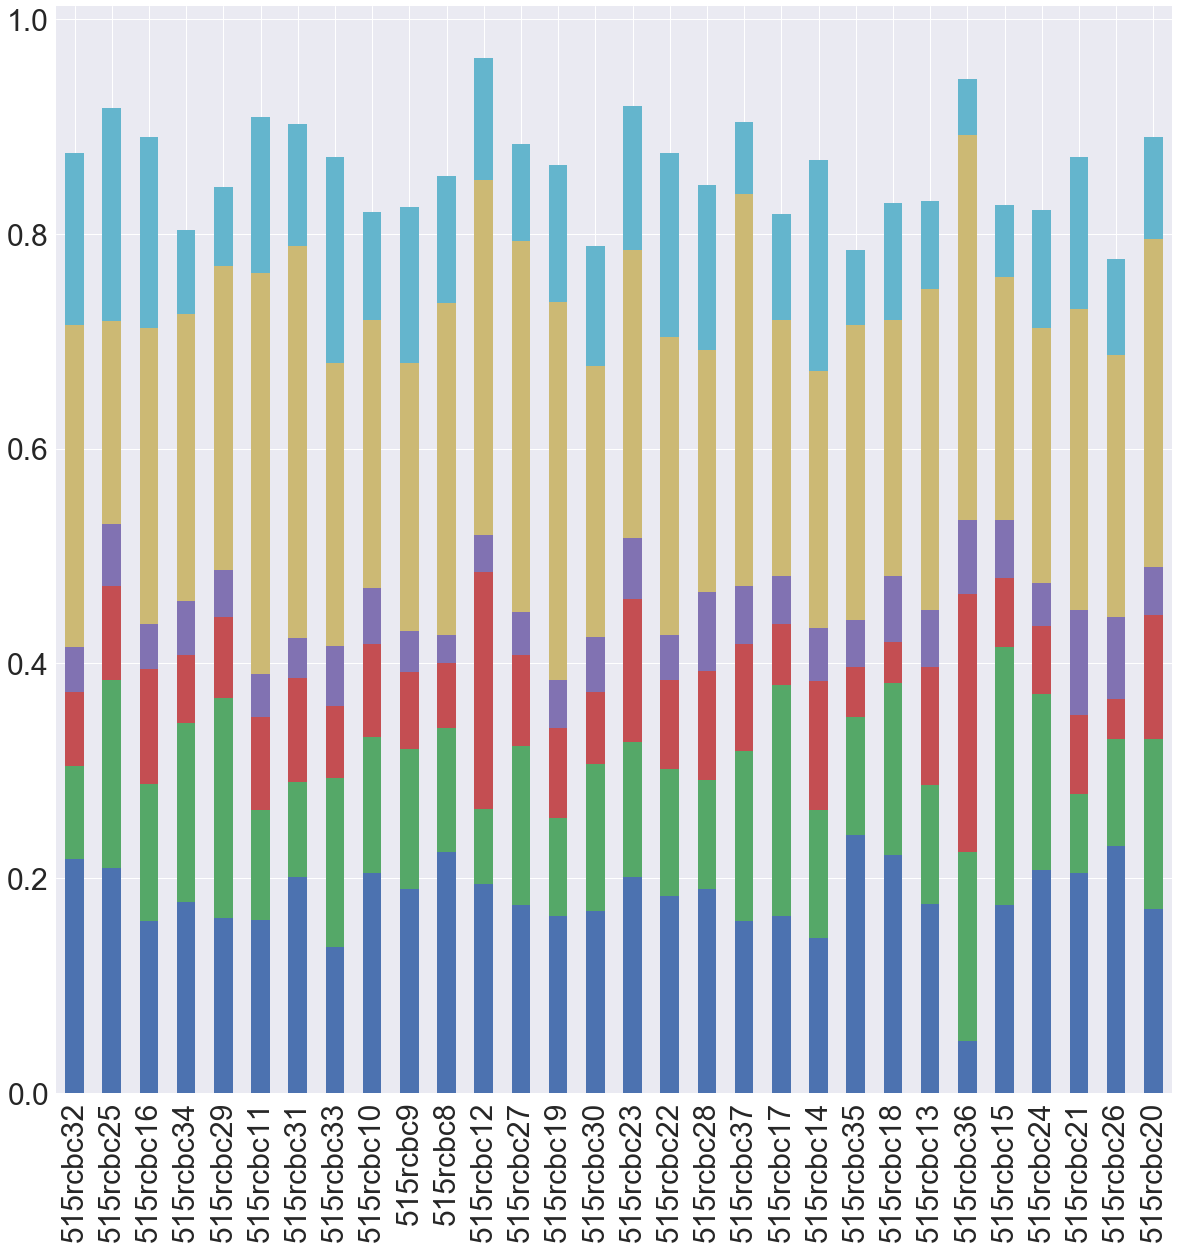

In [39]:
import seaborn as sns
sns.set(font_scale=3.0)
bars = tax_data_high.T.plot(kind='bar', stacked=True, legend=False, figsize = (20,20))
#plt.legend(loc='upper left', fontsize = 12) 
# sns.bar(tax_data.T.values, tax_data.columns)
plt.show()



In [ ]:
fig = plt.figure(figsize=(9, 9), dpi=600)
ax = plt.subplot(111)

x = np.arange(0, 30, 1)
xticks = data.sample_num
ax.bar(x, data['chao1_alpha'].values, facecolor='blue')
plt.xticks(x, xticks)

plt.xlabel('Sample', fontsize =16)
plt.ylabel('A-diversity (chao1)', fontsize =16)
plt.grid(False)

plt.show()



In [63]:
#bacteriodetes abundance by ph 
df = pd.read_csv('~/Documents/bioc3301_project/ngs_data/otu_tables/split_by_tax/bacteriodetes.txt', sep='\t', index_col=0, header=1)
df = df.T

df['sum'] = df.sum(axis=1)
x = df['sum'].sum(axis=0)
df['sum_norm'] = df['sum']/x*100
df





#OTU ID,EU787448.1.1432,JN030439.1.1505,LJOS01000104.3211.4728,DQ990929.1.1503,FPLS01016362.21.1527,FJ516910.1.1489,JQ655791.1.1490,FR687417.1.1494,KC331388.1.1484,EU133704.1.1359,...,FPLS01000908.14.1501,FPLS01018227.1.1369,KR110072.1.1480,FPLS01045412.20.1524,AY212620.1.1506,EF516274.1.1445,JQ793380.1.1483,AYMG01000035.3947.5448,sum,sum_norm
515rcbc32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,41.0,2.524631
515rcbc25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,52.0,3.201970
515rcbc16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,64.0,3.940887
515rcbc34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,2.339901
515rcbc29,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,45.0,2.770936
515rcbc11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,3.201970
515rcbc31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,58.0,3.571429
515rcbc33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,2.463054
515rcbc10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,3.201970
515rcbc9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,2.647783


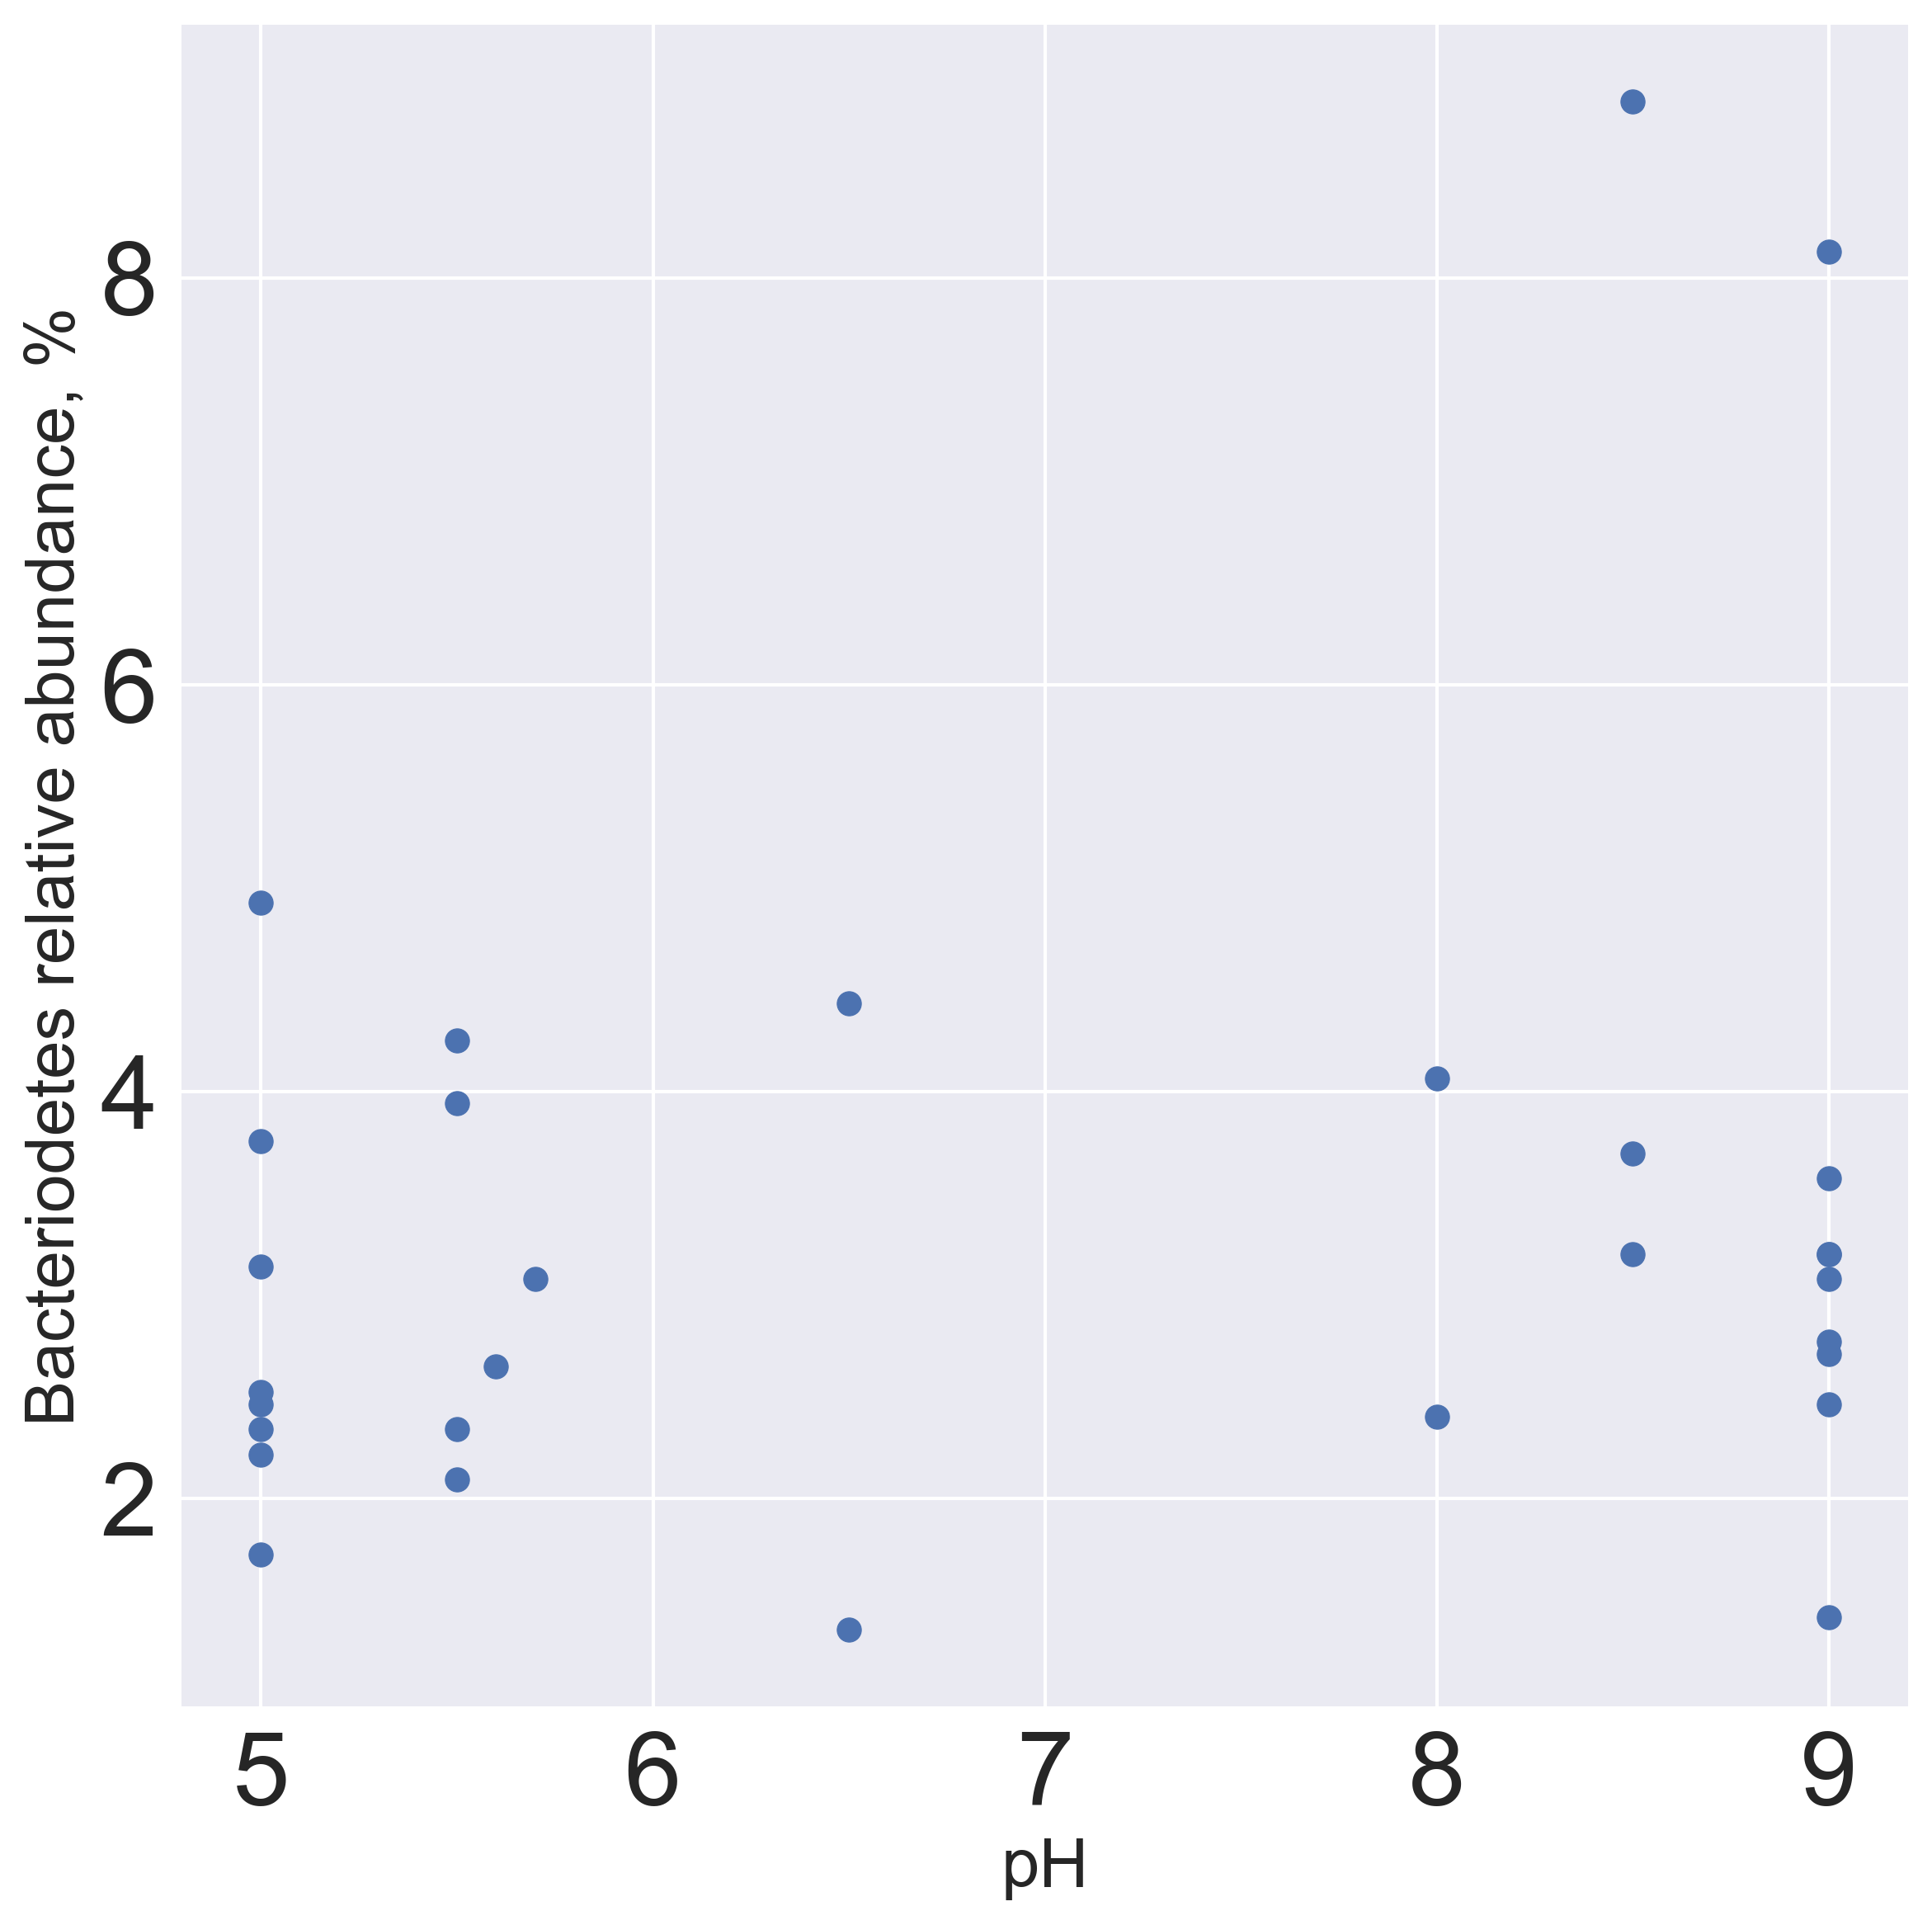

In [65]:
#plot abundance against pH 
fig, axis = plt.subplots(figsize=(9,9), dpi=300)

X = data['SamplePh']
Y = df['sum_norm']

# axis.set_title('a-diversity as a function of soil pH',fontsize=12)
axis.set_xlabel('pH',fontsize=20)
axis.set_ylabel('Bacteriodetes relative abundance, %',fontsize=20)
axis.scatter(X, Y)
# plt.axvline(7.0, linewidth=45, color = 'red', alpha = 0.3)
plt.show()

In [140]:
data.head()

,SampleMoisture,SamplePotassium,SampleNitrogen,SamplePhosphorus,SamplePh,chao1_alpha,chao1_normalized_alpha,sample_num
#SampleID,,,,,,,,
515rcbc20,dry,Medium-High,High,High,5.0,537.581081,0.000000,20
515rcbc36,moist,Low,Medium,Medium,8.5,2764.721939,0.271666,36
515rcbc13,moist,Low,Low,Medium,5.5,3091.626741,0.311542,13
515rcbc8,dry,Medium,Trace,High,5.0,3370.875862,0.345605,8
515rcbc34,dry,Trace,Trace,Low,9.0,3433.055046,0.353190,34


In [145]:
ph_level = []
for i in data['SamplePh'].values:
    if i >=7:
        ph_level.append('high')
    else:
        ph_level.append('low')
data['ph_level'] = ph_level
data

data.to_csv('/Users/solovyev/Documents/bioc3301_project/map_ph_level.txt', sep='\t')
data
    

,SampleMoisture,SamplePotassium,SampleNitrogen,SamplePhosphorus,SamplePh,chao1_alpha,chao1_normalized_alpha,sample_num,ph_level
#SampleID,,,,,,,,,
515rcbc20,dry,Medium-High,High,High,5.0,537.581081,0.000000,20,low
515rcbc36,moist,Low,Medium,Medium,8.5,2764.721939,0.271666,36,high
515rcbc13,moist,Low,Low,Medium,5.5,3091.626741,0.311542,13,low
515rcbc8,dry,Medium,Trace,High,5.0,3370.875862,0.345605,8,low
515rcbc34,dry,Trace,Trace,Low,9.0,3433.055046,0.353190,34,high
515rcbc27,dry,Trace,Trace,Medium,9.0,3557.456057,0.368364,27,high
515rcbc21,moist,Low,Low,Low,9.0,3595.123853,0.372959,21,high
515rcbc37,dry,Medium,Medium,Medium,5.0,3701.727835,0.385962,37,low
515rcbc32,dry,Trace,Low-Medium,Low,9.0,3754.929095,0.392452,32,high
